In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# don't forget to parse the data!

bike = pd.read_csv('dc_bikes.csv', parse_dates=True, index_col=0)



In [4]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


In [5]:
# add 'day of the week' and hour as a column from the data frame:

bike['day_of_week'] = bike.index.day_name()
bike['hour'] = bike.index.hour

In [6]:
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,Monday,19
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,Monday,20
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,Monday,21


In [7]:
# melt:

bike_long = pd.melt(bike,                                       
                        id_vars=['day_of_week', 'hour', 'casual', 'registered' ],
                        value_vars=['count'], 
                        var_name='measurement_type',                     
                        value_name='value')

In [8]:
bike_long

,day_of_week,hour,casual,registered,measurement_type,value
0,Saturday,0,3.0,13.0,count,16
1,Saturday,1,8.0,32.0,count,40
2,Saturday,2,5.0,27.0,count,32
3,Saturday,3,3.0,10.0,count,13
4,Saturday,4,0.0,1.0,count,1
...,...,...,...,...,...,...
17374,Monday,19,NaN,NaN,count,156
17375,Monday,20,NaN,NaN,count,104
17376,Monday,21,NaN,NaN,count,67
17377,Monday,22,NaN,NaN,count,43


In [9]:
bike_long.to_csv('new_bike_data.csv', index=False)

<Axes: xlabel='day_of_week', ylabel='value'>

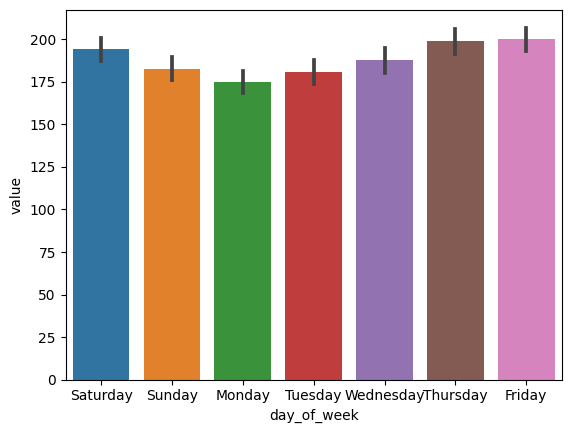

In [10]:
sns.barplot(data=bike_long, x='day_of_week', y='value')

<Axes: xlabel='hour', ylabel='value'>

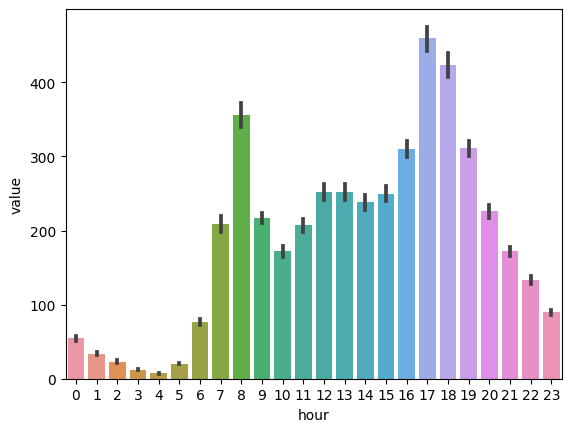

In [31]:
sns.barplot(data=bike_long, x='hour', y='value')

<Axes: xlabel='casual', ylabel='value'>

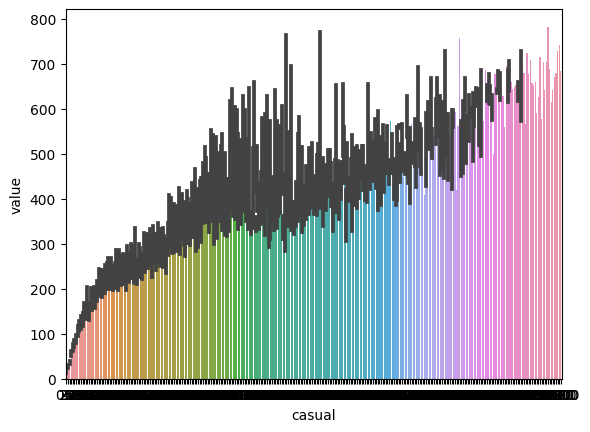

In [37]:
sns.barplot(data=bike_long, x='casual', y='value')

<Axes: xlabel='registered', ylabel='value'>

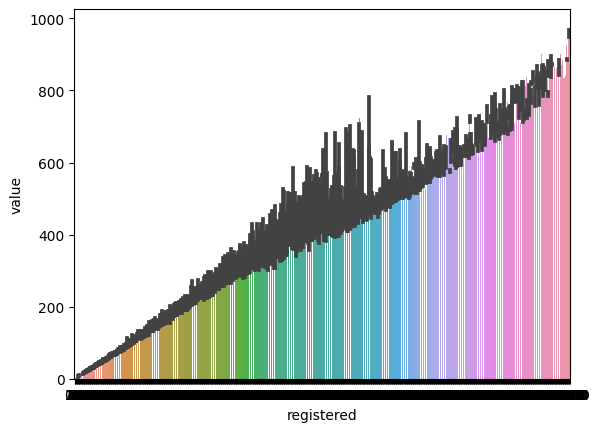

In [38]:
sns.barplot(data=bike_long, x='registered', y='value')